# 의도 분류 모델 학습 데이터 생성하기

## 0. Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Komoran
import matplotlib.pyplot as plt

## 1. 데이터 불러오기

In [2]:
time_expression = pd.read_csv("../dataset/trans-dataset/시간표현탐지데이터.csv")
purpose = pd.read_csv("../dataset/trans-dataset/용도별목적대화데이터.csv")
topic = pd.read_csv("../dataset/trans-dataset/주제별일상대화데이터.csv")
common_sense = pd.read_csv("../dataset/trans-dataset/일반상식.csv")
movie_review = pd.read_csv("../dataset/trans-dataset/영화리뷰.csv")
# add = pd.read_csv("../../변형데이터/추가데이터.csv")

time_expression.dropna(inplace=True)
purpose.dropna(inplace=True)
topic.dropna(inplace=True)
common_sense.dropna(inplace=True)
movie_review.dropna(inplace=True)
# add.dropna(inplace=True)

In [3]:
print(f"time_expression shape => {time_expression.shape}\n\
purpose shape => {purpose.shape}\n\
topic shape => {topic.shape}\n\
common_sense shape => {common_sense.shape}\n\
movie_review shape => {movie_review.shape}\n\
")
# add => {add.shape}")

time_expression shape => (278781, 1)
purpose shape => (172442, 1)
topic shape => (1445793, 1)
common_sense shape => (68538, 3)
movie_review shape => (199992, 3)



In [4]:
time_expression.columns

Index(['text'], dtype='object')

In [5]:
purpose.columns

Index(['text'], dtype='object')

In [6]:
topic.columns

Index(['text'], dtype='object')

In [7]:
common_sense.columns

Index(['intent', 'query', 'answer'], dtype='object')

In [8]:
movie_review.columns

Index(['id', 'document', 'label'], dtype='object')

In [9]:
# add.columns

In [10]:
# all_data = list(time_expression['text']) + list(purpose['text']) + list(topic['text']) + list(common_sense['query']) \
# + list(common_sense['answer']) + list(add['query'])

all_data = list(time_expression['text']) + list(purpose['text']) + list(topic['text']) + list(common_sense['query']) \
+ list(common_sense['answer']) + list(movie_review['document'])

In [11]:
len(all_data)

2234084

In [12]:
# 통합본 생성하고 저장하기
total = pd.DataFrame({'text': all_data})
total.to_csv("../dataset/trans-dataset/통합본데이터.csv", index=False)

## 2. 의도 분류 데이터 생성하기

0 -> 번호, 1 -> 장소, 2 -> 시간, 3 -> 기타  
기타는 추후에 다시 생성 예정

In [13]:
professor = []
place = []
time = []
etc = []

In [33]:
for i in all_data:
    if ('어디' or '장소' or '위치' or '주소') in i: place.append(i)
    elif ('교수' or '교수님') in i: professor.append(i)
    elif ('시작' or '마감' or '언제' or '기간' or '시간' or '일정' or '날짜' or '일자' or '신청일' or '보고일' or '접수일') in i: time.append(i)
    else: etc.append(i)

In [34]:
len(professor)

2064

In [35]:
professor_label = []
for _ in range(len(professor)):
    professor_label.append(0)
len(professor_label)

2064

In [36]:
len(place)

67002

In [37]:
place_label = []
for _ in range(len(place)):
    place_label.append(1)
len(place_label)

67002

In [38]:
len(time)

20070

In [39]:
time_label = []
for _ in range(len(time)):
    time_label.append(2)
len(time_label)

20070

In [40]:
#import random
#random.seed(42)
#etc_sample = random.sample(etc, 20000)

In [41]:
#etc_sample_label = []
#for _ in range(len(etc_sample)):
#    etc_sample_label.append(3)
#len(etc_sample_label)

In [42]:
train_df = pd.DataFrame({'text':professor+place+time,
                         'label':professor_label+place_label+time_label})

In [43]:
train_df.head()

,text,label
0,노노 교수들은 힘들다드라,0
1,교수들 엄청 좋아함,0
2,교수님이 말씀하시길 에이는 비래 그래서 고로 에이는 에프래 뭔소리냐 키키,0
3,교수님이 요즘 자꾸 취직했냐고 물어보셔서 부담이 돼,0
4,너 대학원 다닐 때 교수님이 너 별로 안좋아하셨잖아.,0


In [44]:
train_df.tail()

,text,label
89131,아놔 로그인 하게 만드는;; 시작할때는 그럴듯하게 광고하더니 뒤로 갈수록 왜 이렇게...,2
89132,난 이제 악당이랑 치고 박고 딸을 구하겠구나 싶었는데 끝나더라.. 진짜 허무했음. ...,2
89133,시작하자마자 멍청한 홍콩경찰들,2
89134,ㅋ 우스운영화를보았음..한국공포가 왜이래 한30년전에찍었었나..제대로보여주는것암것도...,2
89135,영화가 시작하고 10분이 지났는데 끄고싶다...끝까지본 내가 자랑스럽다....뻔함의...,2


In [45]:
train_df[train_df['label']==0]

,text,label
0,노노 교수들은 힘들다드라,0
1,교수들 엄청 좋아함,0
2,교수님이 말씀하시길 에이는 비래 그래서 고로 에이는 에프래 뭔소리냐 키키,0
3,교수님이 요즘 자꾸 취직했냐고 물어보셔서 부담이 돼,0
4,너 대학원 다닐 때 교수님이 너 별로 안좋아하셨잖아.,0
...,...,...
2059,고해성사는 가까운 동네 성당에 가서 하세요. 돈들여 페루까지 가지 말고... 겉 멋...,0
2060,추리에 긴장감도 없고 연기 몰입도도 없고..교수랑 조교만 없으면....혹시나 해서 ...,0
2061,"친절하지도 않고, 방법론에 대한 연구도 없이 그냥 한국영화 역사만 나열했다. 이게 ...",0
2062,어처구니가 없는게 아니 재판에 불만있다고해서 석궁들고 판사에게 찾아간거 자체가 잘못...,0


In [46]:
train_df[train_df['label']==1]

,text,label
2064,그 스탬프를 모으면요 어디서 어떻게 사용하나요,1
2065,네 어디서 전화 주신건가요,1
2066,어디에서나 빛나는 주얼리 브랜드 #@소속# 고객센터 입니다,1
2067,이벤트 당첨 확인은 어디서 하나요,1
2068,아 어디서 볼 수 있는 건가요,1
...,...,...
69061,두남자의 숨막히는 추격전??? 어디??? 아...짱나~,1
69062,선비의 자손으로서 아주 복장 터지는 영화!! 황새는 황새다워야 하고 뱃새는 뱃새다워...,1
69063,감독 집이 어디냐,1
69064,satc원작 드라마에 먹칠을 한거 같은 영화드라마도 5후반까진 괜찮았으나 인기입어 ...,1


In [47]:
train_df[train_df['label']==2]

,text,label
69066,시작일,2
69067,연애 시작,2
69068,시작,2
69069,시작,2
69070,시작,2
...,...,...
89131,아놔 로그인 하게 만드는;; 시작할때는 그럴듯하게 광고하더니 뒤로 갈수록 왜 이렇게...,2
89132,난 이제 악당이랑 치고 박고 딸을 구하겠구나 싶었는데 끝나더라.. 진짜 허무했음. ...,2
89133,시작하자마자 멍청한 홍콩경찰들,2
89134,ㅋ 우스운영화를보았음..한국공포가 왜이래 한30년전에찍었었나..제대로보여주는것암것도...,2


In [48]:
#train_df[train_df['label']==3]

In [49]:
train_df.reset_index(drop=True, inplace=True)

In [50]:
train_df.tail()

,text,label
89131,아놔 로그인 하게 만드는;; 시작할때는 그럴듯하게 광고하더니 뒤로 갈수록 왜 이렇게...,2
89132,난 이제 악당이랑 치고 박고 딸을 구하겠구나 싶었는데 끝나더라.. 진짜 허무했음. ...,2
89133,시작하자마자 멍청한 홍콩경찰들,2
89134,ㅋ 우스운영화를보았음..한국공포가 왜이래 한30년전에찍었었나..제대로보여주는것암것도...,2
89135,영화가 시작하고 10분이 지났는데 끄고싶다...끝까지본 내가 자랑스럽다....뻔함의...,2


In [51]:
train_df.to_csv("train_data.csv", index=False)

## 3. 적절한 패딩 길이 구하기

In [52]:
data = pd.read_csv('train_data.csv')

In [53]:
data.shape

(89136, 2)

In [54]:
tokenizer = Komoran()

In [55]:
data_tokenized = [[token+"/"+POS for token, POS in tokenizer.pos(text_)] for text_ in data['text']]

exclusion_tags = [
    'JKS', 'JKC', 'JKG', 'JKO', 'JKB', 'JKV', 'JKQ',
            'JX', 'JC',
            'SF', 'SP', 'SS', 'SE', 'SO',
            'EP', 'EF', 'EC', 'ETN', 'ETM',
            'XSN', 'XSV', 'XSA'
]

f = lambda x: x in exclusion_tags

data_list = []
for i in range(len(data_tokenized)):
        temp = []
        for j in range(len(data_tokenized[i])):
            if f(data_tokenized[i][j].split('/')[1]) is False:
                temp.append(data_tokenized[i][j].split('/')[0])
        data_list.append(temp)

In [56]:
num_tokens = [len(tokens) for tokens in data_list]
num_tokens = np.array(num_tokens)

# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {np.mean(num_tokens)}")
print(f"토큰 길이 최대: {np.max(num_tokens)}")
print(f"토큰 길이 표준편차: {np.std(num_tokens)}")

토큰 길이 평균: 6.976507808292945
토큰 길이 최대: 69
토큰 길이 표준편차: 5.245454742092352


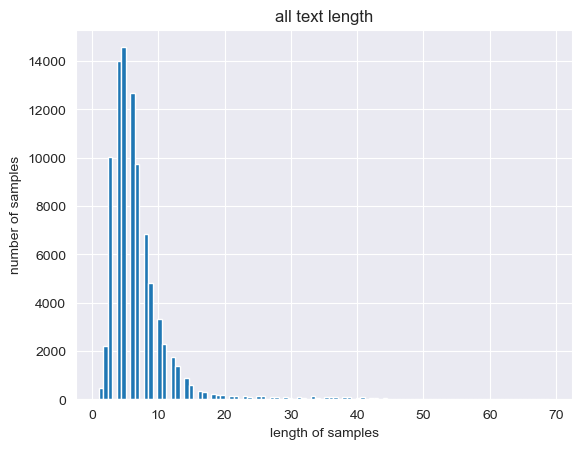

In [57]:
plt.title('all text length')
plt.hist(num_tokens, bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [58]:
select_length = 25

def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
        
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))
    
below_threshold_len(select_length, data_list)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 0.9803109854604201
